# Working with Data

In [7]:
from polymesh.examples import download_stand
from neumann import minmax
import numpy as np

mesh = download_stand(read=True)
F = -10.0

In [8]:
mesh.centralize()
mesh.move(np.array([0.0, 0.0, -mesh.coords()[:, 2].min()]))
coords = mesh.coords()
zmin, zmax = minmax(coords[:, 2])
h = zmax - zmin
zmin, zmax, h

(0.0, 119.99898554822028, 119.99898554822028)

In [9]:
i_f = np.where(coords[:, 2] >= 0.998 * h)[0]
i_u = np.where(coords[:, 2] <= 0.002 * h)[0]

f = F * np.array([0.0, 0.0, 1]) / len(i_f)
loads = np.zeros((coords.shape[0], 3), dtype=float)
loads[i_f] = f
assert F == np.sum(loads)

fixity = np.zeros((coords.shape[0], 3), dtype=bool)
fixity[i_u] = True

In [10]:
mesh.pd.loads = loads
mesh.pd.fixity = fixity
mesh.pd.to_parquet("stand_pd.parquet")
block = list(mesh.cellblocks())[0]
block.cd.to_parquet("stand_cd.parquet")

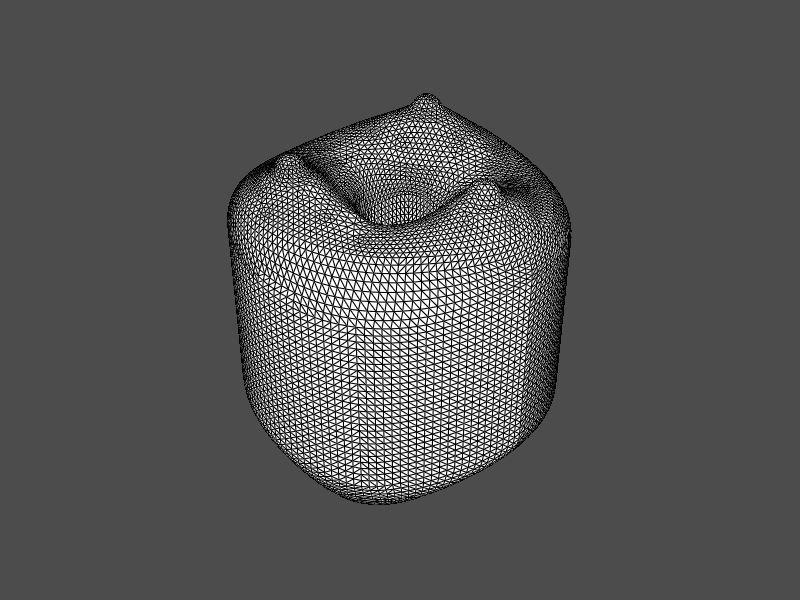

In [11]:
mesh.pvplot(notebook=True, jupyter_backend="static", window_size=(800, 600))